In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

# Hypothesis

The wine description/review sentiment has a positive correlation with the review score.

# Setup data

Read in data and replace unknown values with NA 

In [2]:
wine_data_path = "../data/winemag-data-130k-v2.csv" 

missing_values = ["n/a", "na", "--", "false"]
raw_wine_data = pd.read_csv(wine_data_path, na_values = missing_values)

Select columns relevant for our hypothesis and remove the values with NA

In [3]:
filtered_wine_data = raw_wine_data[['description', 'points']]
clean_wine_data = filtered_wine_data.dropna()

Add a new column with the length of the sentiment

In [4]:
clean_wine_data['description_sentiment'] = clean_wine_data['description'].apply(lambda x: TextBlob(x).sentiment[0])

# Correlation

Correlation between points and description sentiment seems to be close 0

In [5]:
clean_wine_data.corr()

,points,description_sentiment
points,1.000000,0.151526
description_sentiment,0.151526,1.000000


# Points versus grouped description sentiment

Group the panda dataframe by description sentiment and calculate the mean and standard deviation of every group.

In [6]:
sentiment_means = clean_wine_data['points'].groupby(clean_wine_data['description_sentiment']).mean()

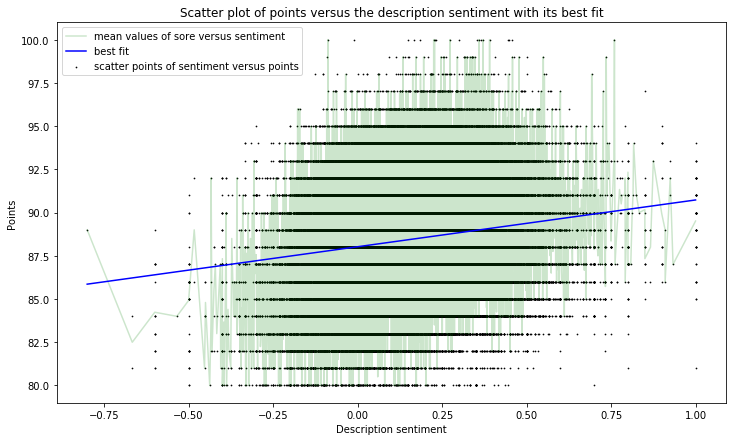

In [7]:
plt.figure(figsize=(12, 7))
title = 'Scatter plot of points versus the description sentiment with its best fit'

xs = clean_wine_data['description_sentiment']
ys = clean_wine_data['points']

plt.scatter(xs, ys, 0.5, c='k', label='scatter points of sentiment versus points')
plt.plot(sentiment_means, alpha=0.2, c='g', label='mean values of sore versus sentiment')
plt.plot(np.unique(xs), np.poly1d(np.polyfit(xs, ys, 1))(np.unique(xs)), color='b', label='best fit')

plt.legend()
plt.xlabel('Description sentiment')
plt.ylabel('Points')
plt.title(title)
plt.savefig('../figures/description_sentiment_correlation/' + title)
plt.show()

# Description sentiment versus grouped point values.

Group the panda dataframe by points and calculate mean and standard deviation of every group.

In [8]:
points_means = clean_wine_data['description_sentiment'].groupby(clean_wine_data['points']).mean()
points_stds = clean_wine_data['description_sentiment'].groupby(clean_wine_data['points']).std()

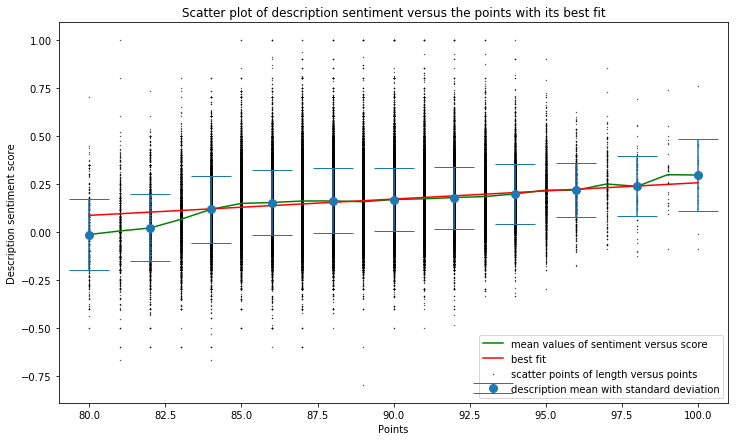

In [9]:
plt.figure(figsize=(12, 7))
title = 'Scatter plot of description sentiment versus the points with its best fit'

xs_points = points_stds.keys()[0::2]
ys_descr = points_means[0::2]
err = points_stds[0::2]

plt.scatter(ys, xs, 0.1, c='k', label='scatter points of length versus points')
plt.plot(points_means, c='g', label='mean values of sentiment versus score')
plt.plot(np.unique(ys), np.poly1d(np.polyfit(ys, xs, 1))(np.unique(ys)), color='r', label='best fit')

(_, caps, _) = plt.errorbar(
    xs_points, ys_descr, yerr=err, fmt='o', markersize=8, capsize=20, label='description mean with standard deviation')
for cap in caps:
    cap.set_markeredgewidth(1)

plt.legend()
plt.xlabel('Points')
plt.ylabel('Description sentiment score')
plt.title(title)
plt.savefig('../figures/description_sentiment_correlation/' + title)
plt.show()  